In [247]:
import numpy as np
import pandas as pd

from math import pi
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from sklearn import preprocessing

from sklearn.datasets import load_iris

In [102]:
iris=load_iris()
raw = pd.DataFrame(iris.data, columns=iris.feature_names)
raw["target"] = iris.target 
raw["target_names"] = iris.target_names[iris.target]
raw

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


# 1. 연속형

## 1) Radar Chart

In [190]:
def radar_chart(target, dataframe):
    df=dataframe[:]
    target='target_names'
    labels=list(df.columns)
    labels.remove(target)
    num_labels = len(labels)

    df=df.groupby(target,as_index=False).mean()
    target_column=df[target]
    x = df.drop(target,axis=1).values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled, columns=labels)
    df = pd.concat([df,target_column],axis=1)

    angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)]
    angles += angles[:1]

    my_palette = plt.cm.get_cmap("Set2",len(df.index))

    fig = plt.figure(figsize=(20,20)) #전체 크기 조정
    fig.subplots_adjust(hspace = 0.5, wspace=0.5) #subplot 사이 간격 조정
    fig.set_facecolor('white')

    for i, row in df.iterrows():
        color = my_palette(i)
        data = df.iloc[i].drop(target).tolist()
        data += data[:1]

        ax = plt.subplot(1, 3, i+1, polar=True)
        ax.set_theta_offset(pi/2)
        ax.set_theta_direction(-1)

        plt.xticks(angles[:-1],labels, fontsize=13)
        ax.tick_params(axis='x', which='major',pad=15)

        ax.set_rlabel_position(0)
        plt.yticks([0,0.2,0.4,0.6,0.8,1],['0','0.2','0.4','0.6','0.8','1'], fontsize=10) ## 반지름 축 눈금 설정
        plt.ylim(0,1)

        ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row[target])
        ax.fill(angles, data, color=color, alpha=0.4)

        plt.title(row[target], size=30, color=color,y=1.2, loc='center') ## 타이틀은 target으로 한다.
        plt.legend(loc=(0.9,0.9))
    return plt.show()

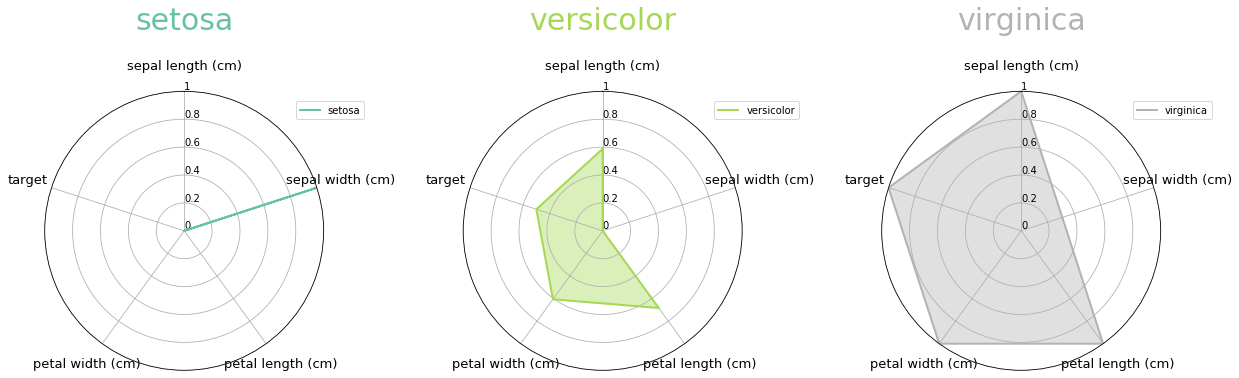

In [191]:
radar_chart('target_names',raw)

## 2) Histogram

### 2-1) 여러 개

- sns.FacetGrid(data, col="A") : A 값 종류 개수만큼 열을 구성하여 시각화.
- sns.FacetGrid(data, col="B", row="C") : B종류 개수만큼 열을 구성하고, "C"종류 개수만큼 열을 시각화.
- sns.FacetGrid(data, col="D", hue="E") : D종류 개수만큼 열을 구성하고, "E"는 한 그래프 내에서 겹쳐서 시각화.

In [248]:
import seaborn as sns

In [220]:
train_df = pd.read_csv("./train.csv")

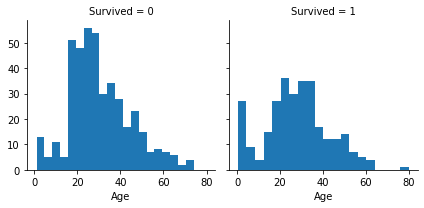

In [232]:
g=sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist,'Age',bins=20) #alpha: 투명도, bins: 히스토그램 두께

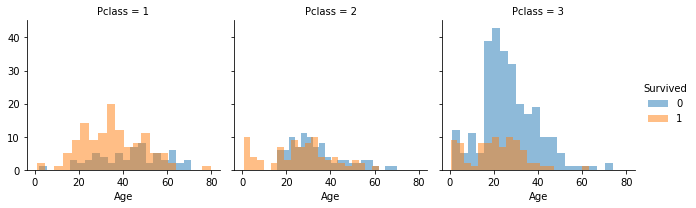

In [240]:
grid=sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid.map(plt.hist, 'Age',alpha=.5,bins=20)
grid.add_legend()

### 2-2) 한 개

Text(0.5, 0, 'sepal length (cm)')

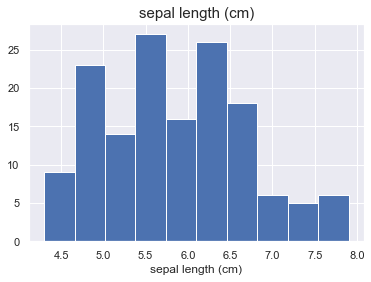

In [266]:
plt.title('sepal length (cm)',size=15, loc='center')
plt.hist(x='sepal length (cm)',data=raw)
plt.xlabel("sepal length (cm)")

## 3) Bar Plot

### 3-1) 여러 개

C:\Users\franc\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


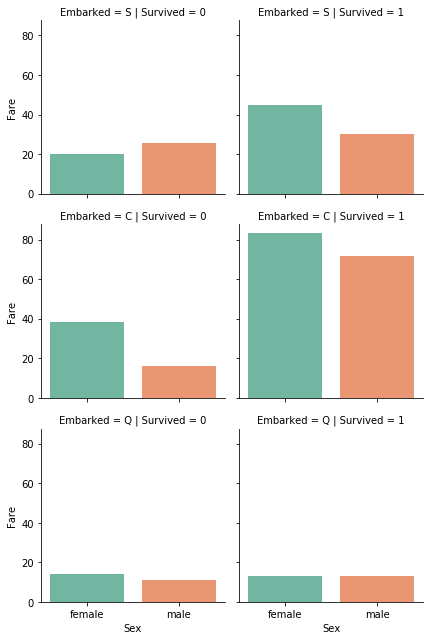

In [224]:
grid=sns.FacetGrid(train_df, row='Embarked',col='Survived')
grid.map(sns.barplot, 'Sex','Fare', ci=None, palette = sns.color_palette("Set2"))
grid.add_legend()

### 3-2) 한 개

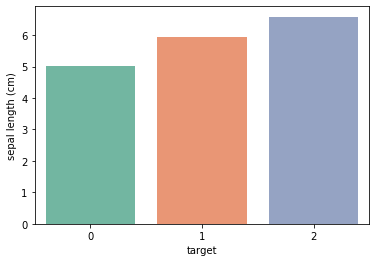

In [212]:
ax= sns.barplot(x='target', y='sepal length (cm)',data=raw, ci=False, palette = sns.color_palette("Set2"))

## 4) Line Graph

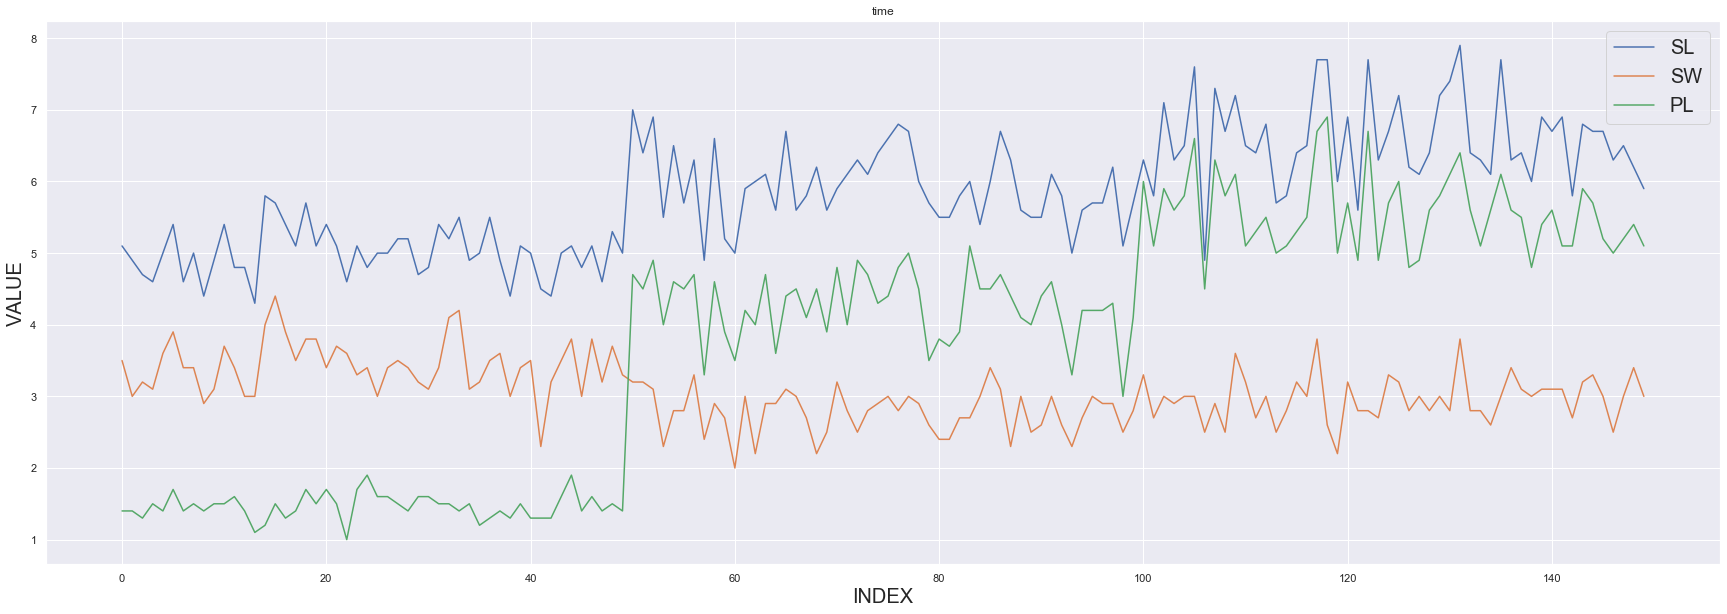

In [277]:
plt.figure(figsize = (30,10))
plt.plot(raw.index, raw['sepal length (cm)'],label = 'SL')
plt.plot(raw.index, raw['sepal width (cm)'], label = 'SW')
plt.plot(raw.index, raw['petal length (cm)'], label = 'PL')
plt.title("time")
plt.ylabel('VALUE', fontsize=20)
plt.xlabel('INDEX', fontsize=20)
plt.legend(loc='upper right',prop={'size': 20})
plt.show()

## 5) 산점도

### 5-1) 여러 개

- Pair Plot 사용하면 자동으로 숫자형이 아닌 것은 제거해준 상태로 나온다.

    -> 그로 인해, 아래의 예제의 경우 "target_names"는 없고, "target"(숫자)가 나올 수 있기에 제고 해준다.

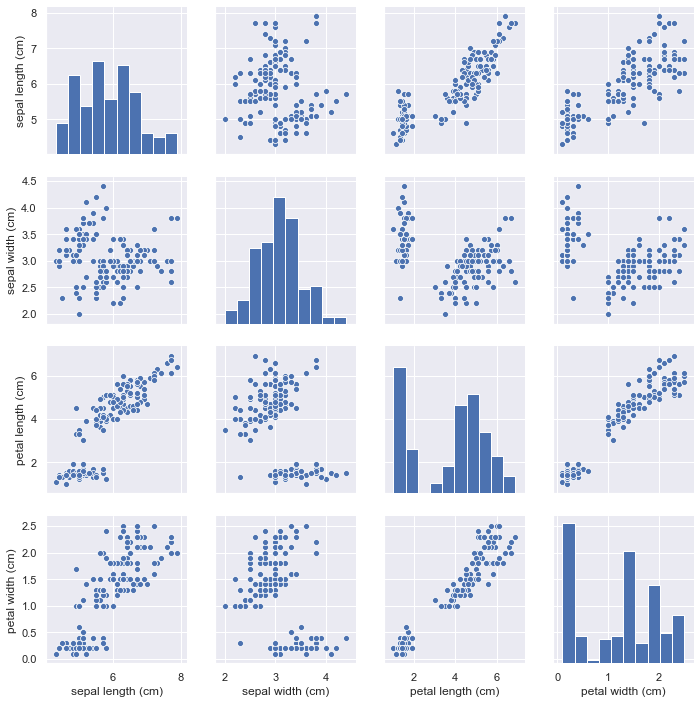

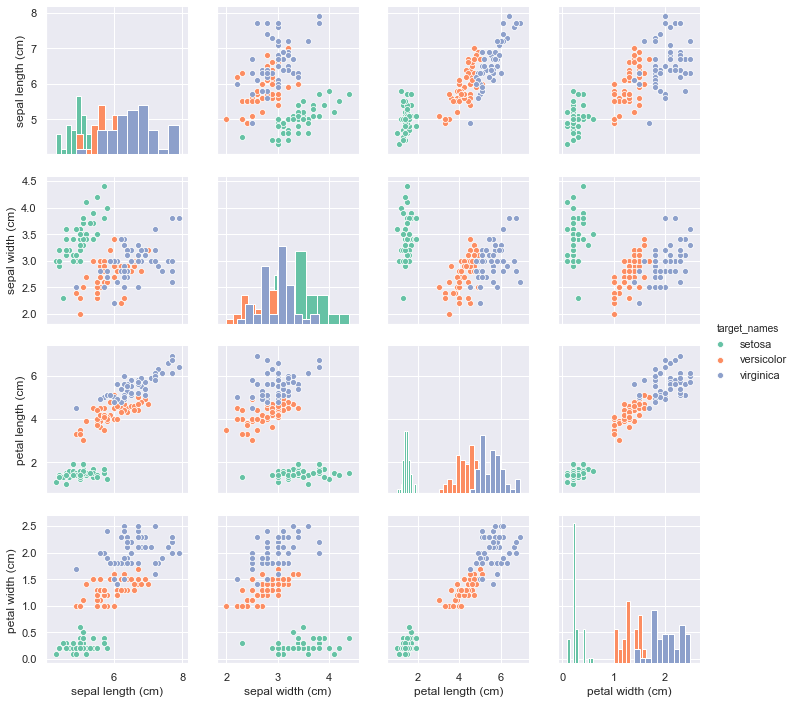

In [296]:
sns.pairplot(raw.drop('target',axis=1), diag_kind='hist')
plt.show()
sns.pairplot(raw.drop('target',axis=1), diag_kind='hist', hue="target_names", palette=sns.color_palette("Set2"))
#diag_kind="kde" : pdf 뽑을 수도 있다.
plt.show()

### 5-2) 한 개

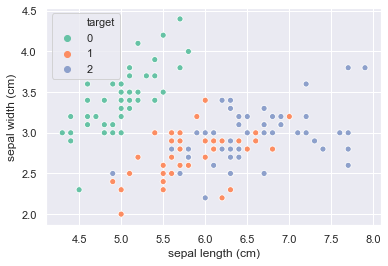

In [297]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data= raw, hue='target',palette=sns.color_palette("Set2")[:3])

# 2. 범주형

C:\Users\franc\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  self : object
C:\Users\franc\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  # If color was a keyword argument, grab it here


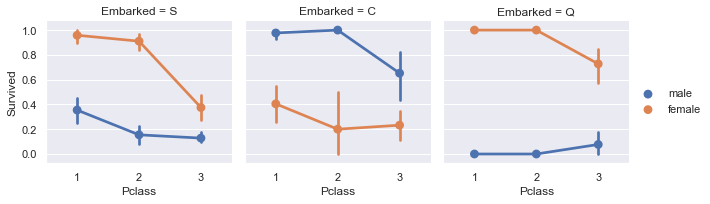

In [298]:
#gird=sns.FacetGrid(train_df, col='Embarked')
grid=sns.FacetGrid(train_df, col='Embarked')
grid.map(sns.pointplot, 'Pclass','Survived','Sex',palette='deep')
grid.add_legend()